### Analyse de variance (ANOVA) pour le bonheur par région

Dans ce code, nous utilisons Python et ses bibliothèques pour effectuer une analyse de variance (ANOVA) afin d'explorer la variation du score de bonheur en fonction des régions. 

In [6]:
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [9]:
data = pd.read_csv('C:/Users/asus/Downloads/2015.csv', sep=";", decimal='.')
data.head()

,"Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual"
0,"Switzerland,Western Europe,1,7.587,0.03411,1.3..."
1,"Iceland,Western Europe,2,7.561,0.04884,1.30232..."
2,"Denmark,Western Europe,3,7.527,0.03328,1.32548..."
3,"Norway,Western Europe,4,7.522,0.0388,1.459,1.3..."
4,"Canada,North America,5,7.427,0.03553,1.32629,1..."


ANOVA à 1 FACTEUR 

In [10]:
# Vérifier les colonnes présentes dans le DataFrame
print(df.columns)


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [11]:
# Définir le modèle linéaire pour l'ANOVA
model = ols('Q("Happiness Score") ~ C(Region)', data=df).fit()

# Effectuer l'ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats de l'ANOVA
print(anova_table)

               sum_sq     df          F        PR(>F)
C(Region)  123.683385    9.0  24.758068  1.747681e-25
Residual    82.151184  148.0        NaN           NaN


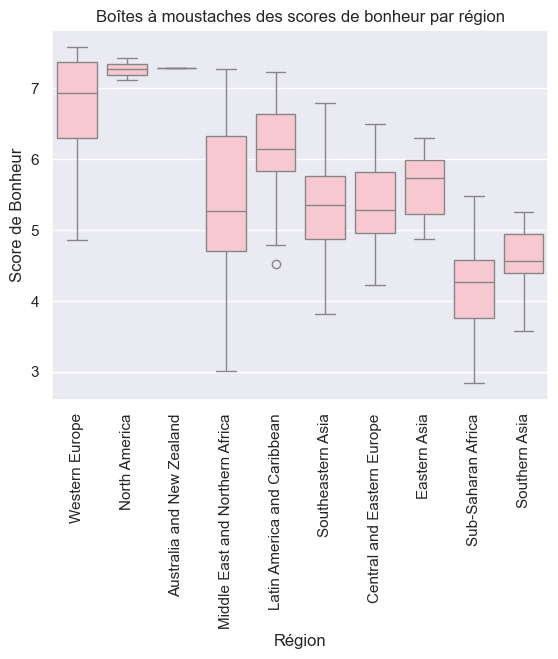

In [12]:
# Visualiser les résultats avec un boxplot
sns.set()
ax = sns.boxplot(x="Region", y="Happiness Score", data=df, color='pink')
plt.xlabel('Région')
plt.ylabel('Score de Bonheur')
plt.title('Boîtes à moustaches des scores de bonheur par région')
plt.xticks(rotation=90)  # Rotation des labels de l'axe x pour une meilleure lisibilité
plt.show()

    ANOVA à 2 facteurs

1. **Définition du modèle linéaire :** Nous utilisons la méthode des moindres carrés ordinaires (`ols`) du module `statsmodels` pour définir un modèle linéaire qui relie le score de bonheur (`"Happiness Score"`) aux différentes régions (`C(Region)`). Le modèle est ajusté aux données à l'aide de la méthode `fit()`.



3. **Affichage des résultats :** Les résultats de l'ANOVA sont stockés dans `anova_table`, puis imprimés à l'aide de la fonction `print()`. Cette table fournit des informations sur la variation du score de bonheur entre les différentes régions et l'importance de cette variation.

Cet ensemble de code est utile pour analyser comment le score de bonheur varie selon les régions et pour identifier les régions qui pourraient avoir un impact significatif sur le bonheur des individus.

In [13]:
# Définir le modèle linéaire pour l'ANOVA à deux facteurs
anova_happiness = smf.ols('Q("Happiness Score") ~ C(Region) + Q("Economy (GDP per Capita)")', data=df).fit()

# Effectuer l'ANOVA
anova_results = sm.stats.anova_lm(anova_happiness, typ=2)

# Afficher les résultats de l'ANOVA
print(anova_results)


                                  sum_sq     df          F        PR(>F)
C(Region)                      25.983139    9.0   7.814029  2.294238e-09
Q("Economy (GDP per Capita)")  27.839730    1.0  75.351329  6.877135e-15
Residual                       54.311454  147.0        NaN           NaN


Dans cette section, nous visualisons les résultats de notre analyse en utilisant des diagrammes en boîte (boxplots). Ces visualisations nous aident à comprendre comment le score de bonheur varie en fonction de différentes variables telles que la région et l'économie.


    - Nous créons un diagramme en boîte pour afficher la distribution des scores de bonheur par région en utilisant `sns.boxplot()`.
   
    - Pour visualiser l'effet de l'économie, nous devons d'abord discrétiser la variable `Economy (GDP per Capita)` en catégories. Cela est réalisé en utilisant `pd.qcut()` pour diviser la variable en quatre catégories (quartiles) et les étiqueter.
   

Ces visualisations sont utiles pour examiner les distributions et les variations des scores de bonheur en fonction de différentes variables, ce qui peut fournir des insights supplémentaires par rapport à l'analyse statistique initiale.


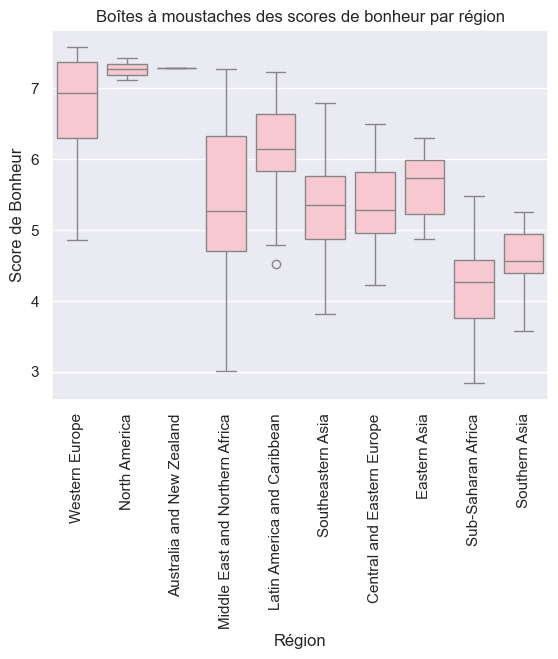

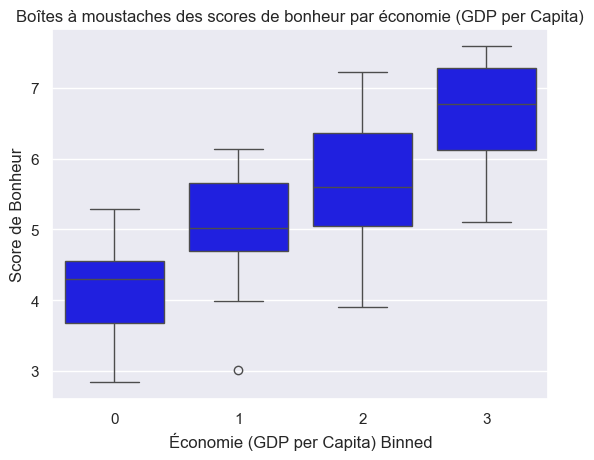

In [14]:
# Visualiser les résultats avec des boxplots
sns.set()

# Boxplot pour l'effet de la région
ax1 = sns.boxplot(x="Region", y="Happiness Score", data=df, color='pink')
plt.xlabel('Région')
plt.ylabel('Score de Bonheur')
plt.title('Boîtes à moustaches des scores de bonheur par région')
plt.xticks(rotation=90)  # Rotation des labels de l'axe x pour une meilleure lisibilité
plt.show()

# Boxplot pour l'effet de l'économie (nous devons discrétiser l'économie pour visualiser)
df['Economy_Binned'] = pd.qcut(df['Economy (GDP per Capita)'], q=4, labels=False)  # Discrétiser en 4 catégories

ax2 = sns.boxplot(x="Economy_Binned", y="Happiness Score", data=df, color='blue')
plt.xlabel('Économie (GDP per Capita) Binned')
plt.ylabel('Score de Bonheur')
plt.title('Boîtes à moustaches des scores de bonheur par économie (GDP per Capita)')
plt.show()


En observant ce boxplot, nous pouvons comparer les distributions des scores de bonheur entre les différentes régions. Les régions avec des boîtes plus étroites ont une variation plus faible des scores de bonheur, tandis que celles avec des boîtes plus larges montrent une plus grande variation. Les régions avec des médianes plus élevées ont, en général, des scores de bonheur plus élevés.
